# Candlestick Unique 3 River

https://www.investopedia.com/terms/u/unique-three-river.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'ICLR'
start = '2012-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,17.34,17.450001,16.820000,17.270000,17.270000,210300
2012-01-04,17.17,17.340000,16.969999,17.059999,17.059999,188600
2012-01-05,16.92,17.230000,16.730000,17.180000,17.180000,159800
2012-01-06,17.08,17.559999,17.080000,17.500000,17.500000,147600
2012-01-09,17.57,17.920000,17.290001,17.780001,17.780001,185200


## Candlestick with Unique 3 River

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,734505.0,17.34,17.450001,16.820000,17.270000,17.270000,210300,False
1,734506.0,17.17,17.340000,16.969999,17.059999,17.059999,188600,False
2,734507.0,16.92,17.230000,16.730000,17.180000,17.180000,159800,True
3,734508.0,17.08,17.559999,17.080000,17.500000,17.500000,147600,True
4,734511.0,17.57,17.920000,17.290001,17.780001,17.780001,185200,True


Text(0, 0.5, 'Price')

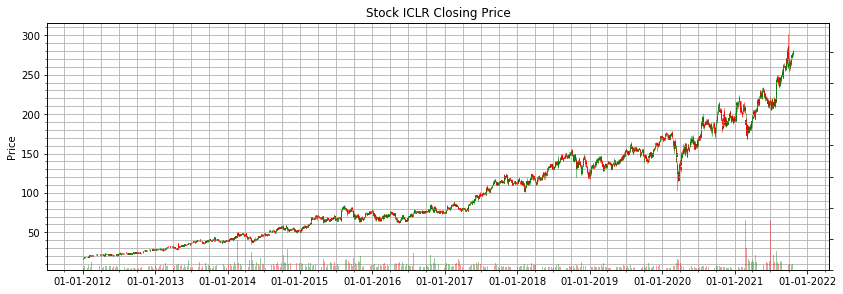

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
unique = talib.CDLUNIQUE3RIVER(df['Open'], df['High'], df['Low'], df['Close'])

unique = unique[unique != 0]

In [6]:
df['unique'] = talib.CDLUNIQUE3RIVER(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['unique'] !=0]

,Open,High,Low,Close,Adj Close,Volume,unique
Date,,,,,,,
2012-12-28,27.430000,27.980000,27.379999,27.570000,27.570000,224000,100
2016-06-21,64.870003,65.879997,64.820000,65.000000,65.000000,479200,100
2016-08-18,75.650002,76.089996,75.099998,75.809998,75.809998,360800,100
2016-08-26,74.889999,75.919998,74.709999,75.290001,75.290001,201000,100
2017-01-19,80.389999,81.769997,79.769997,80.739998,80.739998,441300,100
2017-07-11,98.320000,99.489998,98.209999,98.790001,98.790001,225900,100


In [8]:
df['Adj Close'].loc[df['unique'] !=0]

Date
2012-12-28    27.570000
2016-06-21    65.000000
2016-08-18    75.809998
2016-08-26    75.290001
2017-01-19    80.739998
2017-07-11    98.790001
Name: Adj Close, dtype: float64

In [9]:
df['unique'].loc[df['unique'] !=0].index

DatetimeIndex(['2012-12-28', '2016-06-21', '2016-08-18', '2016-08-26',
               '2017-01-19', '2017-07-11'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
unique

Date
2012-12-28    100
2016-06-21    100
2016-08-18    100
2016-08-26    100
2017-01-19    100
2017-07-11    100
dtype: int32

In [11]:
unique.index

DatetimeIndex(['2012-12-28', '2016-06-21', '2016-08-18', '2016-08-26',
               '2017-01-19', '2017-07-11'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,unique
Date,,,,,,,
2012-01-03,17.340000,17.450001,16.820000,17.270000,17.270000,210300,0
2012-01-04,17.170000,17.340000,16.969999,17.059999,17.059999,188600,0
2012-01-05,16.920000,17.230000,16.730000,17.180000,17.180000,159800,0
2012-01-06,17.080000,17.559999,17.080000,17.500000,17.500000,147600,0
2012-01-09,17.570000,17.920000,17.290001,17.780001,17.780001,185200,0
...,...,...,...,...,...,...,...
2021-10-15,273.559998,277.809998,271.890015,275.040009,275.040009,308300,0
2021-10-18,275.079987,276.880005,273.500000,276.570007,276.570007,239200,0
2021-10-19,276.929993,279.679993,276.320007,277.579987,277.579987,451800,0


Text(0, 0.5, 'Price')

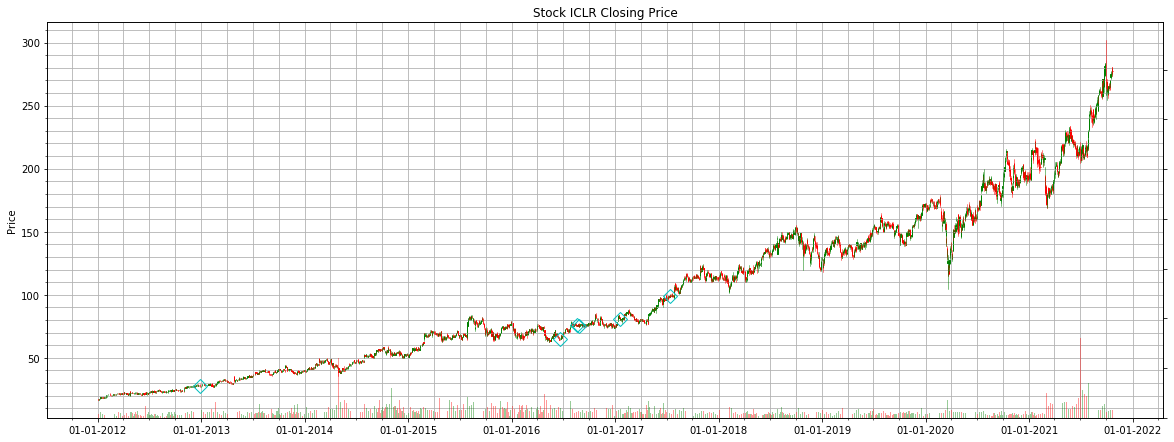

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['unique'] !=0].index, df['Adj Close'].loc[df['unique'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2017-07-01':'2017-08-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,unique,VolumePositive
0,736513.0,97.500000,98.230003,96.959999,97.580002,97.580002,124900,0,True
1,736515.0,97.709999,99.070000,97.050003,98.139999,98.139999,411300,0,True
2,736516.0,98.019997,98.750000,96.029999,96.480003,96.480003,158100,0,False
3,736517.0,98.989998,99.440002,97.330002,98.239998,98.239998,600400,0,False
4,736520.0,98.570000,98.620003,97.099998,98.339996,98.339996,303200,0,False


Text(0, 0.5, 'Price')

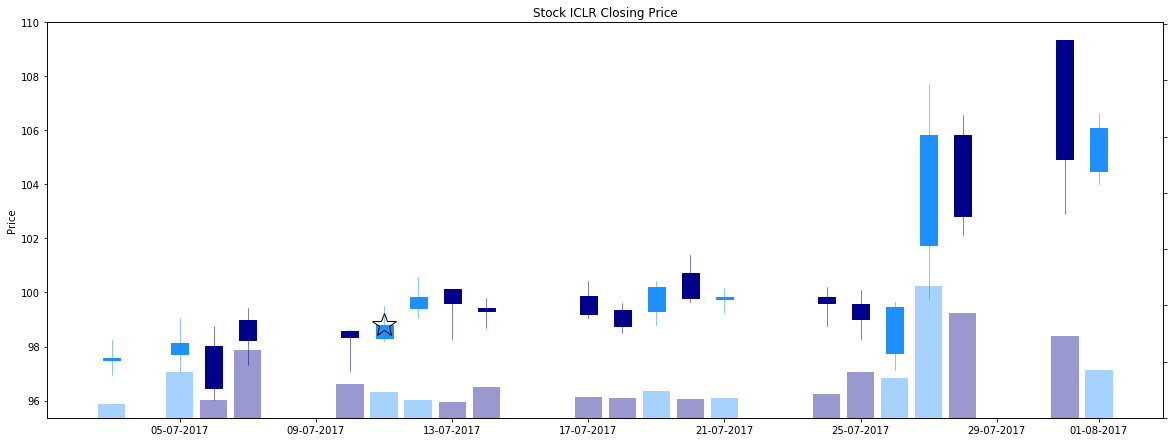

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('white')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='dodgerblue', colordown='darkblue', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['unique'] !=0].index, df['Adj Close'].loc[df['unique'] !=0],
                '*k', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'dodgerblue', False: 'darkblue'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

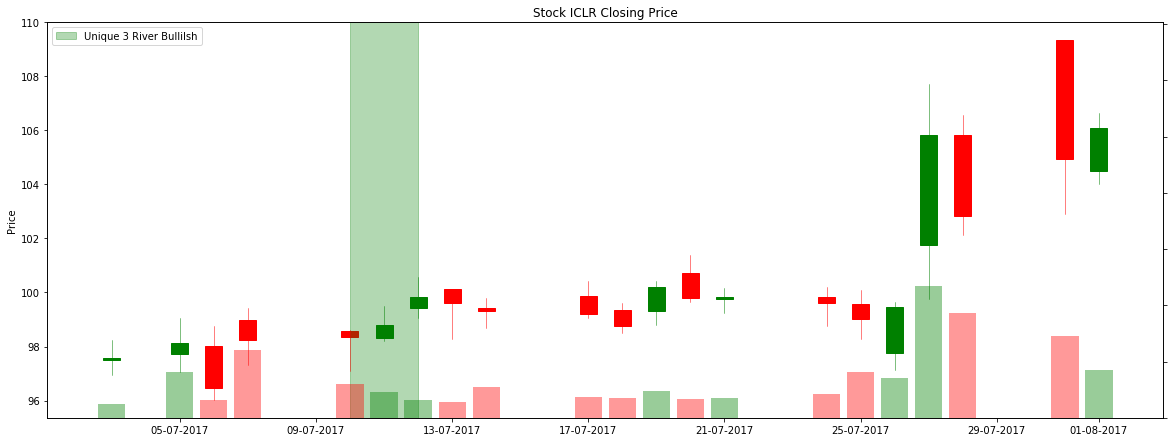

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2017,7,10)), date2num(datetime(2017,7,12)), 
           label="Unique 3 River Bullilsh",color="green", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')